In [25]:
import sqlite3
import time        # to genearte unix value
import datetime    # to generate datestamp value
import random      # to generate random value
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

(1589812111.0933943, '2020-05-18 19:58:31', 'Python', 8.0)
(1589812113.3850658, '2020-05-18 19:58:33', 'Python', 8.0)


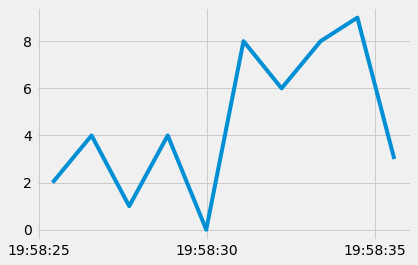

In [26]:
conn = sqlite3.connect("mydb1.db")
#cursor
c = conn.cursor()

def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS table1(unix REAL, datestamp TEXT, keyword TEXT, value REAL)  ')
    #sql keywords are in capitals and
    #user defined words are in small cases but sql in case in-sensitive
    #stuffToPlot is tablename
    #unix,datestamp,keyword,value are column names
    #REAL,TEXT are datatypes
    
# def data_entry():
#     c.execute("INSERT INTO table1 VALUES(1451443435, '2016-1-1', 'Python', 5) " )
#     conn.commit()
#     c.close()
#     conn.close()
# create_table()

def dynamic_data_entry():
    # defining 4 variables we're going to insert
    unix = time.time()
    datestamp = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = 'Python'
    value = random.randrange(0,10)
    
    c.execute("INSERT INTO table1 (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)", (unix, datestamp, keyword, value))
    conn.commit()

def retrieve_data():
    # c.execute('SELECT * FROM table1') #select all columns
    #c.execute('SELECT keyword, value, datestamp, unix FROM table1')  #change order of columns
    #c.execute('SELECT datestamp, value FROM table1') #select only some particular columns
    c.execute('SELECT * FROM table1 WHERE value=8')
    #     data = c.fetchall()
    #     print(data)
    for row in c.fetchall():
        # print(row[0])
        print(row)
        
def graph_data():
    c.execute('select unix, value from table1')
    dates = []
    values = []
    for row in c.fetchall():
        #print(row[0])
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
    plt.plot_date(dates,values,'-')
    plt.show()
    
# create_table()

# for i in range(10):
#     dynamic_data_entry()
#     time.sleep(1)  #to get diff datestamp for each iteration

retrieve_data()
graph_data()

c.close()
conn.close()